In [2]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, minmax_scale, robust_scale
from matplotlib import font_manager, rc
import os

## 수치형 기초 통계량 확인
### 생존 , 승객 등급, 나이 , SibSp, Parch 는 명목척도와 비율척도로 이루어짐 

In [8]:
df_raw = pd.read_csv(os.getcwd()+'/3. Big Data 분석_실습화일/titanic.csv')
df_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 이상치 갯수 확인

In [9]:
df_raw = df_raw.drop("PassengerId", axis=1)
df_raw.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## 데이터 속성 확인

In [273]:
df_raw_num = df_raw.select_dtypes(exclude="object")
df_raw_num.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [332]:
df_raw_char = df_raw.select_dtypes(include="object")
df_raw_char.head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


## 목적 변수 분포 확인

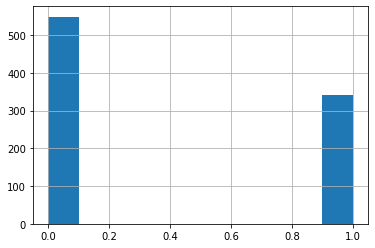

In [277]:
df_raw["Survived"].hist()

## 설명 변수 분포 확인

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbae771ba50>,
      dtype=object)

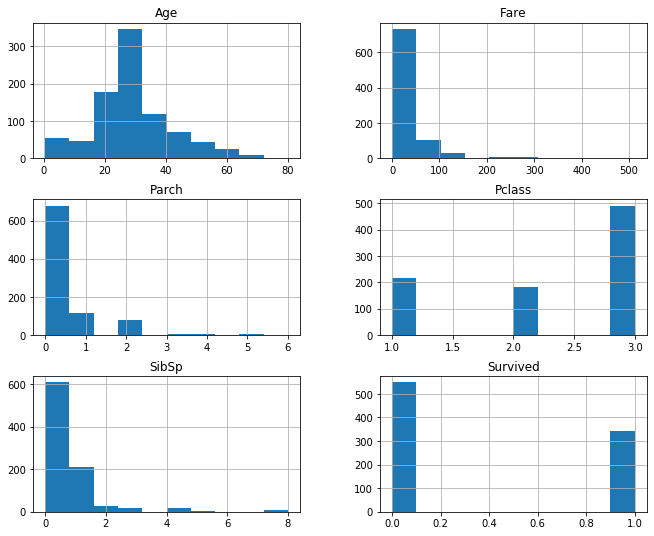

In [330]:
df_raw_num.hist(figsize=(11,9))

## 승객 등급별 생존 확률

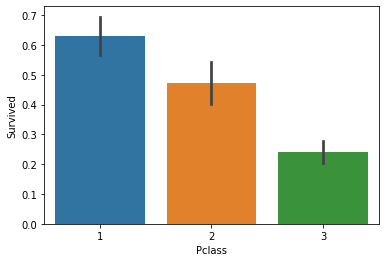

In [334]:
sns.barplot(x="Pclass", y="Survived", data=df_raw)

## 연령대별 생존 확률

In [10]:
# age -> 연령대
for i in range(8):
    df_raw.loc[(df_raw["Age"]>=(i*10)) & (df_raw["Age"]<((i+1)*10)), "Age"] = (i*10)
#df_raw = df_raw[df_raw["Age"]!=80]

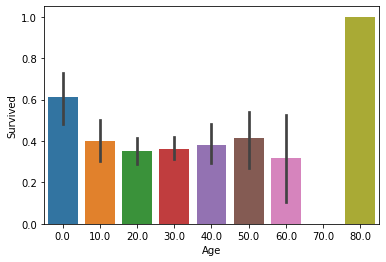

In [11]:
sns.barplot(x="Age", y="Survived", data=df_raw)

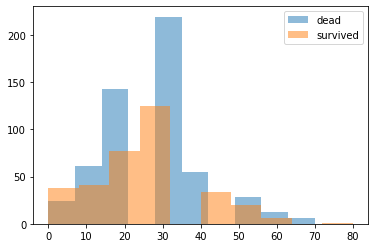

In [15]:
plt.hist(df_raw[df_raw["Survived"]==0]["Age"],label="dead", alpha=0.5)
plt.hist(df_raw[df_raw["Survived"]==1]["Age"],label="survived", alpha=0.5)
plt.legend()

## 함께 탑승한 형제,배우자 수별 생존 확률

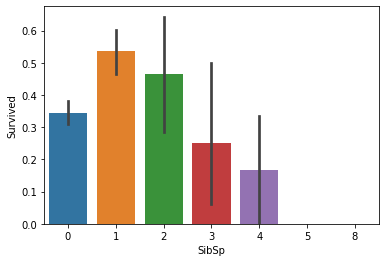

In [12]:
sns.barplot(x="SibSp", y="Survived", data=df_raw)

## 함께 탑승한 자녀, 부모의 수별 생존 확률

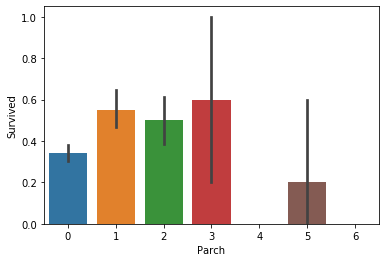

In [299]:
sns.barplot(x="Parch", y="Survived", data=df_raw)

## 탑승 요금 구간별 생존 확률

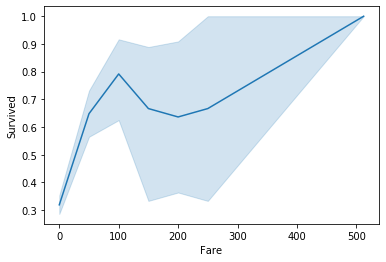

In [13]:
# fare -> 50달러 단위
for i in range(10):
    df_raw.loc[(df_raw["Fare"]>=(i*50)) & (df_raw["Fare"]<((i+1)*50)), "Fare"] = (i*50)
sns.lineplot(x="Fare", y="Survived", data=df_raw)

## 성별간 생존 확률

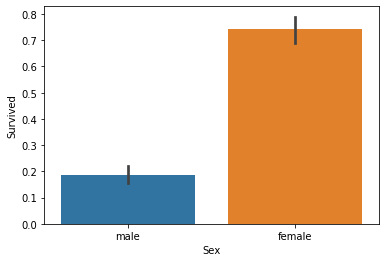

In [302]:
sns.barplot(x="Sex", y="Survived", data=df_raw)

## 탑승지별 생존 확률

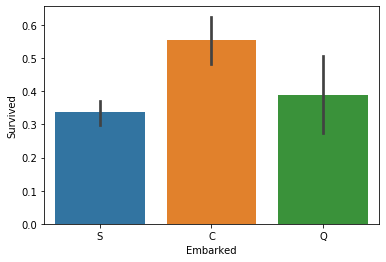

In [304]:
sns.barplot(x="Embarked", y="Survived", data=df_raw)

# 생존에 영향을 미치는 잠재 인자 도출
## 성 호칭을 추출한 분포 확인

In [19]:
for person in [df_raw]:
    person['Gender Title'] = person['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
df_raw.loc[(df_raw["Gender Title"]!='Mr') & 
           (df_raw["Gender Title"]!='Miss') & 
           (df_raw["Gender Title"]!='Mrs'), "Gender Title"] = "etc"

In [20]:
df_raw['Gender Title'].value_counts()

Mr      517
Miss    182
Mrs     125
etc      67
Name: Gender Title, dtype: int64

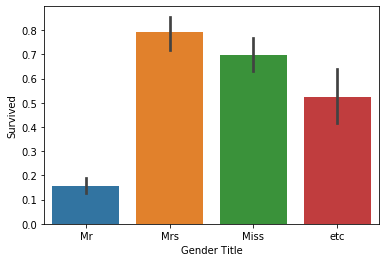

In [21]:
sns.barplot(x="Gender Title", y="Survived", data=df_raw)

## 그래프 분석을 통한 변수 관계 도출

## Age & 성별

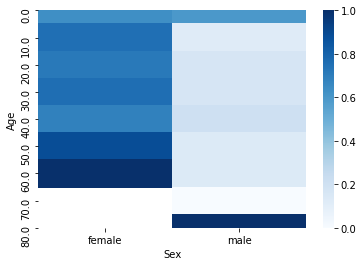

In [22]:
t = df_raw.groupby(["Age", "Sex"], as_index=False).agg("mean")
t = t.pivot("Age", "Sex", "Survived")
sns.heatmap(t, cmap="Blues")

## Age & Gender Title

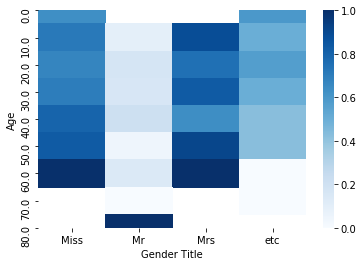

In [23]:
t = df_raw.groupby(["Age", "Gender Title"], as_index=False).agg("mean")
t = t.pivot("Age", "Gender Title", "Survived")
sns.heatmap(t, cmap="Blues")

## 성별 & Pclass

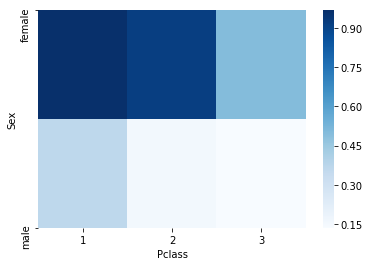

In [323]:
t = df_raw.groupby(["Sex","Pclass"],as_index = False).agg("mean")
t = t.pivot("Sex","Pclass",'Survived')
sns.heatmap(t, cmap = "Blues")